# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd                     #pandas is a dataframe library
import matplotlib.pyplot as plt         #matplotlib.pyplot plots data  
import numpy as np                      #numpy provides N-dim object support

#do ploting inline instead in a separate window
%matplotlib inline

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Load and review data

In [3]:
df = pd.read_csv("./data/pima-data.csv")  #load pima data.

In [4]:
df.shape

(768, 10)

In [6]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [8]:
df.isnull().values.any()

False

In [9]:
def plot_corr(df, size=11):
    """
      Function plots a graphical correlation matrix for each pair of columns in the data frame,
      
      Input:
        df: pandas dataframe
        size: vertical and horizontal size of the plot
        
      Displays:
        matix off correlation between columns. Blue-cyan-yellow-red-darkred=> less to more corelated
                                                0----------------------->1
                                                Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr() #data_fframe correlation function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # colour code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tick marks

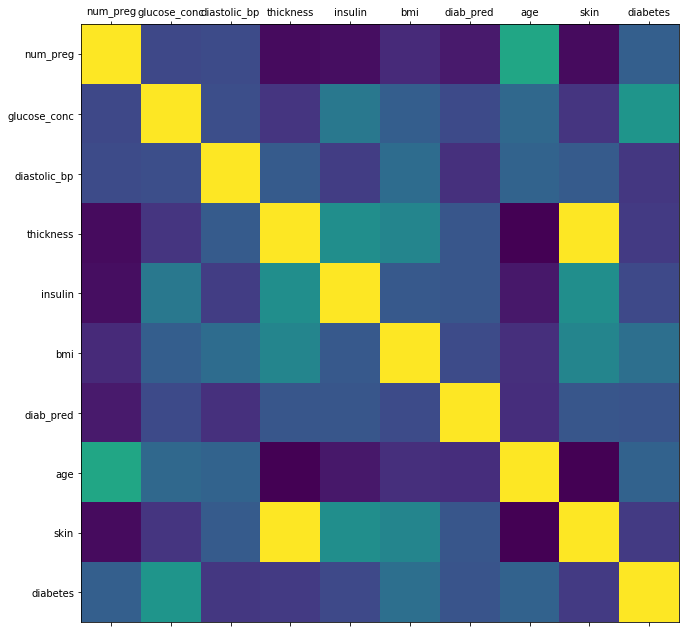

In [10]:
plot_corr(df)

In [11]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [12]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [13]:
del df['skin']

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


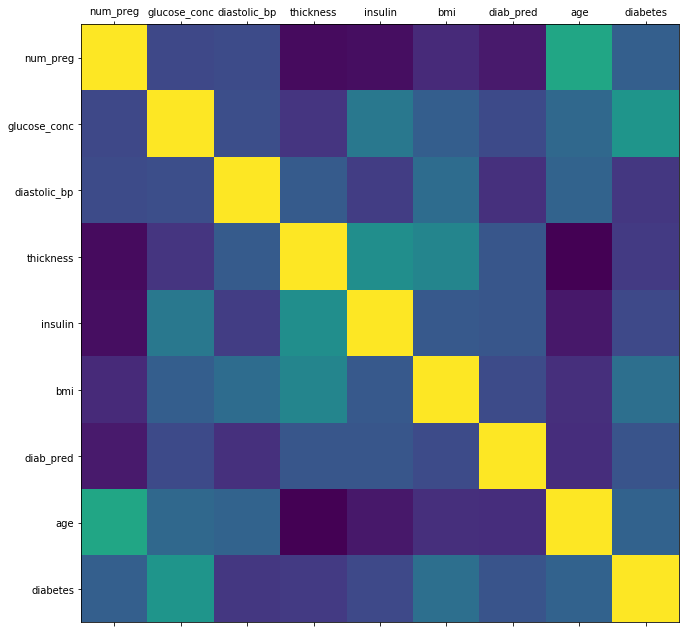

In [15]:
plot_corr(df)

## Check Data Types

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


change True to 1, False to 0

In [18]:
diabeted_map = {True : 1, False : 0}

In [19]:
df['diabetes']=df['diabetes'].map(diabeted_map)

In [20]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [22]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false)) *100))
print("Number of false cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false)) *100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


## Spliting the data

70% for training, 30 % for testing

In [24]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values    # predictor feator columns (8 x m)
y = df[predicted_class_names].values # Predicted class columns (1 x m)

split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
                        # test_size = 0.3 is 30%, 42 is the answer to everything
    

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## we check to ensure we have desired 70-30 split


In [25]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


#### Veryfying predicted value was split correctly

In [26]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Original true cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false)) *100))
print("Originalfalse cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false)) *100))

num_true = len(y_train[y_train[:]== 1])
num_false = len(y_train[y_train[:]== 0])
print("Training true cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false)) *100))
print("Training false cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false)) *100))

num_true = len(y_test[y_test[:]== 1])
num_false = len(y_test[y_test[:]== 0])
print("Test true cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false)) *100))
print("Test false cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false)) *100))

Original true cases: 268 (34.90%)
Originalfalse cases: 500 (65.10%)
Training true cases: 188 (35.01%)
Training false cases: 349 (64.99%)
Test true cases: 80 (34.63%)
Test false cases: 151 (65.37%)


### Post split data prep

#### Hidden Missing value

In [27]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?
How many rows have unexpected 0 values?

In [29]:
print("# rows in dataframe {0}".format(len(df)))

# rows in dataframe 768


### Impute with the mean

In [30]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 reading

fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)


### Training Initial Algorithm - Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

#Create Gaussian Naive Bayes model object and train it with the data

nb_mode1 = GaussianNB()

nb_mode1.fit(x_train,y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

  ### Performance on Training Data

In [32]:
#predict values using the training data
nb_predict_train = nb_mode1.predict(x_train)

#import the performance metrics library

from sklearn import metrics

#Accuracy

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7542


### Performance on Testing Data

In [36]:
#predict values using the test data
nb_predict_test = nb_mode1.predict(x_test)

#import the performance metrics library

from sklearn import metrics

#Accuracy

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7359


### Confusion matrix

In [37]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



   ## Random Forest Algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_mode1 = RandomForestClassifier(random_state=42) # create rf object
rf_mode1.fit(x_train, y_train.ravel())

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict training data

In [39]:
rf_predict_train = rf_mode1.predict(x_train)

#training metrics

print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))

Accuracy : 0.9870


In [40]:
rf_predict_test = rf_mode1.predict(x_test)

print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))

Accuracy : 0.7100


In [41]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion matrix
[[121  30]
 [ 37  43]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

   micro avg       0.71      0.71      0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



### Logistic Regression Algorithm

In [42]:
from sklearn.linear_model import LogisticRegression

lr_mode1 = LogisticRegression(C=0.7,random_state=42)
lr_mode1.fit(x_train,y_train.ravel())
lr_predict_test = lr_mode1.predict(x_test)

#training metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print(metrics.confusion_matrix(y_test,lr_predict_test))
print("")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


setting regularisation value to achieve higher recall value

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

1st max value of 0.613 occurred ar C=1.400


Text(0, 0.5, 'recall sccore')

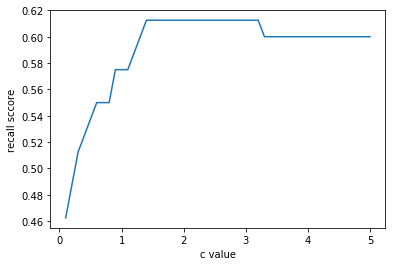

In [48]:
c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []

c_val = c_start
best_recall_score = 0
while (c_val < c_end):
    c_values.append(c_val)
    lr_mode1_loop = LogisticRegression(C = c_val,random_state=42)
    lr_mode1_loop.fit(x_train,y_train.ravel())
    lr_mode1_predict_test = lr_mode1_loop.predict(x_test)
    
    recall_score = metrics.recall_score(y_test,lr_mode1_predict_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test=lr_mode1_predict_test
        
    c_val = c_val + c_inc
    
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occurred ar C={1:.3f}".format(best_recall_score,best_score_c_val))

%matplotlib inline

plt.plot(c_values,recall_scores,"-")
plt.xlabel("c value")
plt.ylabel("recall sccore")
    

### Logistic regression with class_weight='balanced'

1st max value of 0.738 occurred ar C=0.300


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Text(0, 0.5, 'recall sccore')

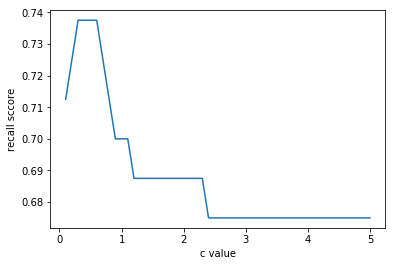

In [49]:
c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []

c_val = c_start
best_recall_score = 0
while (c_val < c_end):
    c_values.append(c_val)
    lr_mode1_loop = LogisticRegression(C = c_val,class_weight="balanced", random_state=42)
    lr_mode1_loop.fit(x_train,y_train.ravel())
    lr_mode1_predict_test = lr_mode1_loop.predict(x_test)
    
    recall_score = metrics.recall_score(y_test,lr_mode1_predict_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test=lr_mode1_predict_test
        
    c_val = c_val + c_inc
    
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occurred ar C={1:.3f}".format(best_recall_score,best_score_c_val))

%matplotlib inline

plt.plot(c_values,recall_scores,"-")
plt.xlabel("c value")
plt.ylabel("recall sccore")
    

In [51]:
from sklearn.linear_model import LogisticRegression

lr_mode1 = LogisticRegression(C=best_score_c_val,class_weight="balanced",random_state=42)
lr_mode1.fit(x_train,y_train.ravel())
lr_predict_test = lr_mode1.predict(x_test)


#training metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print(metrics.confusion_matrix(y_test,lr_predict_test))
print("")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

   micro avg       0.71      0.71      0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### LogisticRegressionCV

In [54]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_mode1 = LogisticRegressionCV(n_jobs=1,random_state=42,Cs=3,cv=10,refit=False,class_weight="balanced")
lr_cv_mode1.fit(x_train,y_train.ravel())


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [55]:
lr_cv_predict_test=lr_cv_mode1.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test,lr_cv_predict_test))
print("")
print(metrics.classification_report(y_test,lr_cv_predict_test))

Accuracy: 0.7013
[[108  43]
 [ 26  54]]

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

   micro avg       0.70      0.70      0.70       231
   macro avg       0.68      0.70      0.68       231
weighted avg       0.72      0.70      0.71       231

